## Capstone Project: Sprint 1

### Customer Behaviour Analysis (EDA)

Prepared by: **Ninos Kako**

In this section I am going to explore and conduct an Exploratory Data Analysis EDA in order to obtain a thorough understanding of the dataset, we will look at each of the columns and examine any potential relationships.

**Data Description**

This Online Retail II dataset contains all the transactions occurring for a UK-based and
registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly
sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
The dataset consists of over 500k rows, and below are the columns and their descriptions:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
## necessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## The excel file contains a
## reading both sheets from the excel file.

df1 = pd.read_excel('data/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('data/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [3]:
## putting it together to form the full dataset

df = pd.concat([df1,df2]).reset_index().drop('index', axis=1)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
## getting the shape of the dataset.

print(f'This dataset has {df.shape[1]} columns, and {df.shape[0]} rows.')

This dataset has 8 columns, and 1067371 rows.


In [5]:
## 

df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [5]:
## looking at data types and missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Notice that *'Description'* and *'Customer ID'* columns have missing values, we will look into them later.

In [7]:
### let's check for those missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Description and Customer ID columns have 4382 and 243007 missing values respectively.

In [8]:
## Now, let's start our EDA.
## first let's create a new column that calculates the total price.

df['Total'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [9]:
## let's investigate 'Invoice' column

print(f"There were {df['Invoice'].nunique()} purchases made between 01-12-2009 and 09-12-2011 and")
print(f"they generated a total of {format(df['Total'].sum().round(2), ',')} GBP for the store.")

There were 53628 purchases made between 01-12-2009 and 09-12-2011 and
they generated a total of 19,287,250.57 GBP for the store.


In [6]:
## Number of customers
df['Customer ID'].nunique()

5942

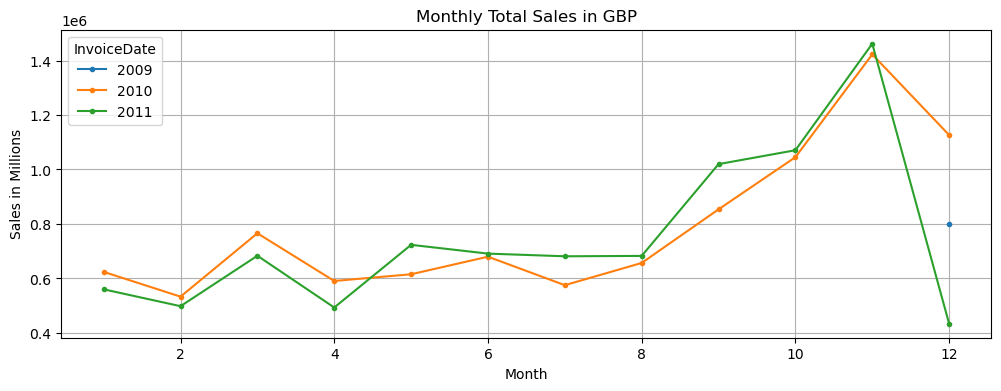

In [10]:
# Monthly Total sales
(pd.crosstab(df['InvoiceDate'].dt.month, df['InvoiceDate'].dt.year,\
            values=df['Total'], aggfunc='sum')).plot(kind='line',figsize=(12,4), marker='.')
plt.ylabel('Sales in Millions')
plt.xlabel('Month')
plt.title('Monthly Total Sales in GBP')
plt.grid(visible=True)
plt.savefig('Monthly Sales.png', dpi=500, orientation='landscape')
plt.show()

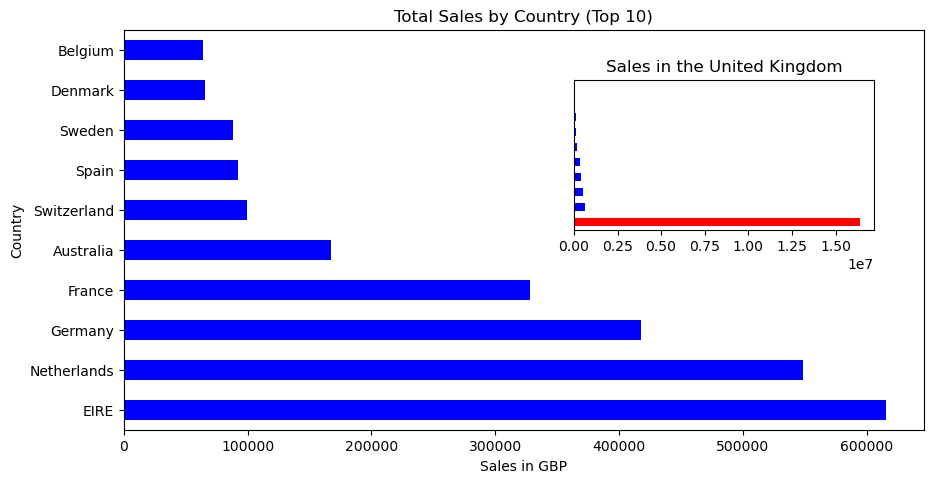

In [11]:
## sales by country
fig = plt.figure(figsize=(10,5))
color = ['r','b','b','b','b','b','b','b','b','b']
fig.add_axes([0.1,0.1,0.8,0.8])
df[df['Country'] != 'United Kingdom'].groupby('Country')['Total']\
.sum().sort_values(ascending=False).head(10).plot(kind='barh',color='b')
plt.xlabel('Sales in GBP')
plt.title('Total Sales by Country (Top 10)')

fig.add_axes([0.55,0.5,0.3,0.3])
df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10).plot(kind='barh',color=color)
plt.yticks([])
plt.ylabel(None)
plt.title('Sales in the United Kingdom')
plt.show()
fig.savefig('Sales.png',dpi=500, orientation='landscape')

Over 91% of the transactions were made in the United Kingdom, the other countries represent 9% of the transactions all togerther, the above graph shows the top 10 of them.

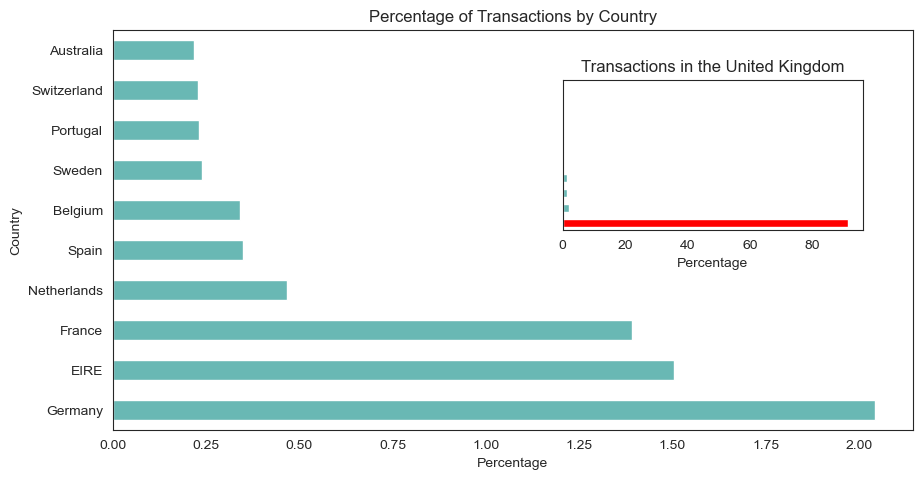

In [48]:
# plotting number of Transactions by country

fig= plt.figure(figsize=(10,5))
color=['r','#69b8b4','#69b8b4','#69b8b4','#69b8b4','#69b8b4','#69b8b4','#69b8b4','#69b8b4','#69b8b4']
fig.add_axes([0.1,0.1,0.8,0.8])

(df[df['Country']!= 'United Kingdom'].groupby('Country')['Invoice'].nunique().sort_values(ascending=False)
 /df['Invoice'].nunique()*100).head(10).plot(kind='barh', color='#69b8b4')

plt.xlabel('Percentage')
plt.title('Percentage of Transactions by Country')

fig.add_axes([0.55,0.5,0.3,0.3])

(df.groupby('Country')['Invoice'].nunique().sort_values(ascending=False)
 /df['Invoice'].nunique()*100).head(10).plot(kind='barh', color=color)
plt.yticks([])
plt.ylabel(None)
plt.xlabel('Percentage')
plt.title('Transactions in the United Kingdom')
plt.show()
fig.savefig('Transactions.png',dpi=500, orientation='landscape')

In [13]:
## The top 10 most sold items
df.groupby(['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False).head(10)

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     108545
85123A     WHITE HANGING HEART T-LIGHT HOLDER     92453
84879      ASSORTED COLOUR BIRD ORNAMENT          81306
85099B     JUMBO BAG RED RETROSPOT                77671
17003      BROCADE RING PURSE                     70700
21977      PACK OF 60 PINK PAISLEY CAKE CASES     56575
84991      60 TEATIME FAIRY CAKE CASES            54366
22197      SMALL POPCORN HOLDER                   49616
21212      PACK OF 72 RETROSPOT CAKE CASES        49344
           PACK OF 72 RETRO SPOT CAKE CASES       46106
Name: Quantity, dtype: int64

Note that StockCode 21212 has more than one description.

In [14]:
## let's check the entire 'Description' column
Description = pd.DataFrame(df.groupby('StockCode')['Description'].unique()).reset_index()
Description

,StockCode,Description
0,10002,"[INFLATABLE POLITICAL GLOBE , nan]"
1,10080,"[GROOVY CACTUS INFLATABLE, nan, check]"
2,10109,"[BENDY COLOUR PENCILS, nan]"
3,10120,"[DOGGY RUBBER, Zebra invcing error]"
4,10125,[MINI FUNKY DESIGN TAPES]
...,...,...
5300,gift_0001_60,[nan]
5301,gift_0001_70,"[nan, Dotcomgiftshop Gift Voucher £70.00]"
5302,gift_0001_80,"[nan, Dotcomgiftshop Gift Voucher £80.00]"
5303,gift_0001_90,[nan]


In [15]:
## number of Descriptions per item.

nm = pd.DataFrame(df.groupby('StockCode')['Description'].nunique()).reset_index()
nm['Description'].value_counts()

Description
1    3718
2     953
0     355
3     204
4      57
5       9
7       4
6       4
9       1
Name: count, dtype: int64

In [16]:
## number of cases where an item has more than Description (ie terribly documented)

print(nm[nm['Description']>1]['StockCode'].count(),'items have more than one desription')
print(nm[nm['Description']==0]['StockCode'].count(),'items have no desription (missing values)')

1232 items have more than one desription
355 items have no desription (missing values)


In [17]:
## The most expensive items.

df[df['Price']>0].groupby(['StockCode','Description'])['Price'].max().sort_values(ascending=False).head(20)

StockCode     Description                        
M             Manual                                 38970.00
BANK CHARGES  Bank Charges                           18910.69
AMAZONFEE     AMAZON FEE                             17836.46
B             Adjust bad debt                        11062.06
POST          POSTAGE                                 8142.75
ADJUST        Adjustment by john on 26/01/2010 17     5117.03
DOT           DOTCOM POSTAGE                          4505.17
D             Discount                                1867.86
84016         FLAG OF ST GEORGE CAR FLAG              1157.15
CRUK          CRUK Commission                         1100.44
BANK CHARGES   Bank Charges                            848.43
22502         PICNIC BASKET WICKER 60 PIECES           649.50
S             SAMPLES                                  605.18
ADJUST        Adjustment by Peter on 24/05/2010 1      358.47
ADJUST2       Adjustment by Peter on Jun 25 2010       358.47
ADJUST        Adjust

In [56]:
## Let's see what this AMAZONFEE is.
df[df['StockCode']=='AMAZONFEE']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom,-6706.71
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom,6706.71
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom,-1.00
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,-13474.79
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,-5519.25
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom,-6706.71
539975,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom,-1.00


Well, these could be considered expenses and that is a valid reason Customer ID is missing.
Moreover, the most expensive item is 'FLAG OF ST GEORGE CAR FLAG' which was selling for over 1000 GBP. This is actually suspicious, let's investigate it further.

In [57]:
## let's see what is going on with this item 'FLAG OF ST GEORGE CAR FLAG'.

df[df['Description']=='FLAG OF ST GEORGE CAR FLAG'].sort_values('Price',ascending=False).tail(25)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
151868,503837,84016,FLAG OF ST GEORGE CAR FLAG,12,2010-04-07 16:21:00,0.42,17738.0,United Kingdom,5.04
178053,506264,84016,FLAG OF ST GEORGE CAR FLAG,24,2010-04-28 14:53:00,0.42,13715.0,United Kingdom,10.08
183159,506818,84016,FLAG OF ST GEORGE CAR FLAG,12,2010-05-04 12:45:00,0.42,18245.0,United Kingdom,5.04
183962,506873,84016,FLAG OF ST GEORGE CAR FLAG,24,2010-05-04 16:18:00,0.42,17188.0,United Kingdom,10.08
185485,507029,84016,FLAG OF ST GEORGE CAR FLAG,24,2010-05-05 14:52:00,0.42,16556.0,United Kingdom,10.08
210262,509700,84016,FLAG OF ST GEORGE CAR FLAG,12,2010-05-25 12:13:00,0.42,13989.0,United Kingdom,5.04
187563,507218,84016,FLAG OF ST GEORGE CAR FLAG,12,2010-05-06 19:08:00,0.42,14713.0,United Kingdom,5.04
867037,566760,84016,FLAG OF ST GEORGE CAR FLAG,25,2011-09-14 16:36:00,0.42,15272.0,United Kingdom,10.50
195071,508053,84016,FLAG OF ST GEORGE CAR FLAG,12,2010-05-12 13:11:00,0.42,12418.0,Switzerland,5.04
198747,508484,84016,FLAG OF ST GEORGE CAR FLAG,2,2010-05-16 12:54:00,0.42,17582.0,United Kingdom,0.84


Note that the Customer ID is missing at all the records where the price is different from *'original'*.

In [19]:
## let's look at the invoice# 507637.
df[df['Invoice']==507637]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
192196,507637,84016,FLAG OF ST GEORGE CAR FLAG,1,2010-05-10 14:55:00,1157.15,NaN,United Kingdom,1157.15
192197,507637,84016,FLAG OF ST GEORGE CAR FLAG,10200,2010-05-10 14:55:00,0.00,NaN,United Kingdom,0.00


This is probably a data input and/or a system mistake. Will have to investigate further with other items.

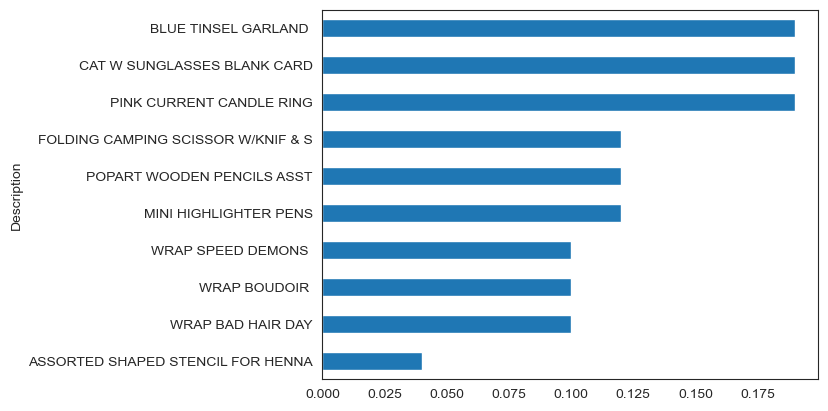

In [46]:
## the cheapest items 

df[(df['Price']>0)].groupby(['Description'])['Price'].max().sort_values().head(10).plot(kind='barh');

In [21]:
## Looking at the highest invoice value.
df.groupby(['Invoice'])['Total'].sum().sort_values(ascending=False).head(20)

Invoice
581483    168469.60
541431     77183.60
574941     52940.94
576365     50653.91
533027     49844.99
531516     45332.97
493819     44051.60
556444     38970.00
524181     33167.80
537659     31770.98
567423     31698.16
537632     27082.66
526934     26007.08
512771     25111.09
537640     23080.68
515944     22863.36
503061     22853.77
556917     22775.93
572209     22206.00
567381     22104.80
Name: Total, dtype: float64

In [59]:
## let's lookg at the first invoice.
df[df['Invoice']==581483]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


In [23]:
## Now, this customer.
df[df['Customer ID']==16446.0] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
371780,C525275,TEST001,This is a test product.,-2,2010-10-04 16:38:00,4.50,16446.0,United Kingdom,-9.00
719815,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,1.65
719816,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,1.25
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60


Hmm! Huge purchase, returned in about 12 minutes?!

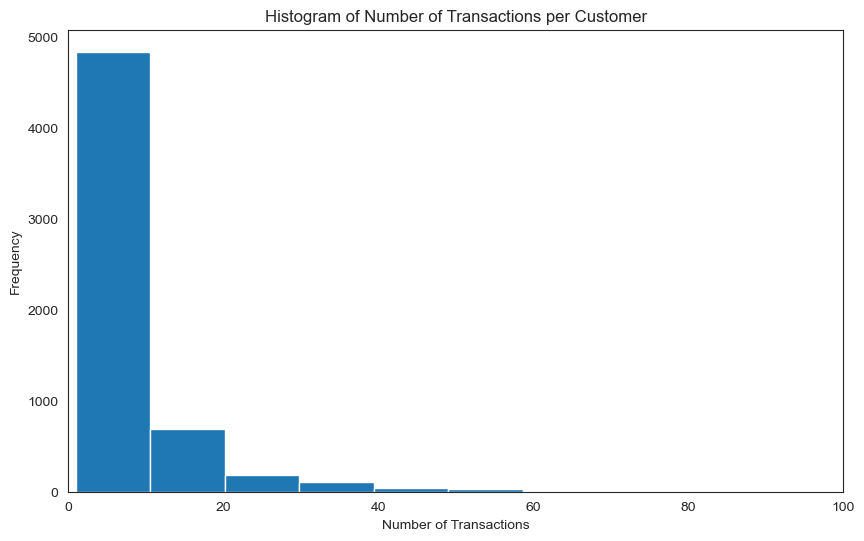

In [55]:
## number of transactions per customer
plt.figure(figsize=(10,6))
df.groupby('Customer ID')['Invoice'].nunique().sort_values(ascending=False)\
.plot(kind='hist',bins=53,xlim=(0,100), edgecolor='white')
plt.xlabel('Number of Transactions')
plt.title('Histogram of Number of Transactions per Customer');

The majority proportion of customers made between 1 to 10 purchases.

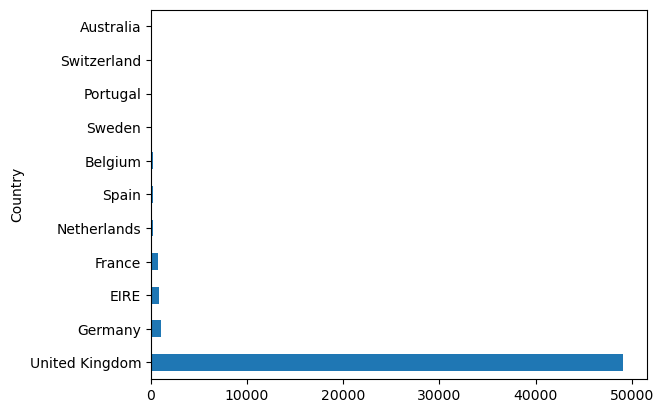

In [31]:
# number of customers by country
df.groupby('Country')['Invoice'].nunique().sort_values(ascending=False).head(11).plot(kind='barh');

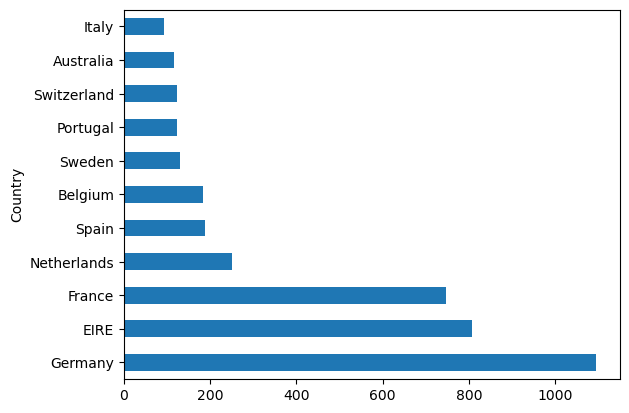

In [26]:
df[df['Country']!= 'United Kingdom'].groupby('Country')['Invoice'].nunique()\
.sort_values(ascending=False).head(11).plot(kind='barh');